# **Stock Price Prediction Using LSTM**

We would predicting the stock price of stock "SBIN" using LSTM . We would intially train the data that we will be importing using library function and then , try to predict price for that particular stock.

In [105]:
#Importing all the required library files
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [106]:
#Importing training data from dataset
stk_data=pd.read_csv('/content/Traindata_SBI.csv')
stk_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2013,240.490005,243.404999,239.755005,242.645004,162.694351,17202300.0
1,02-01-2013,245.000000,246.399994,243.815002,245.054993,164.310226,14660120.0
2,03-01-2013,246.000000,248.240005,243.619995,247.160004,165.721664,20103090.0
3,04-01-2013,246.000000,249.294998,245.065002,248.669998,166.734131,13705950.0
4,07-01-2013,249.000000,249.899994,246.175003,246.759995,165.453461,10264490.0


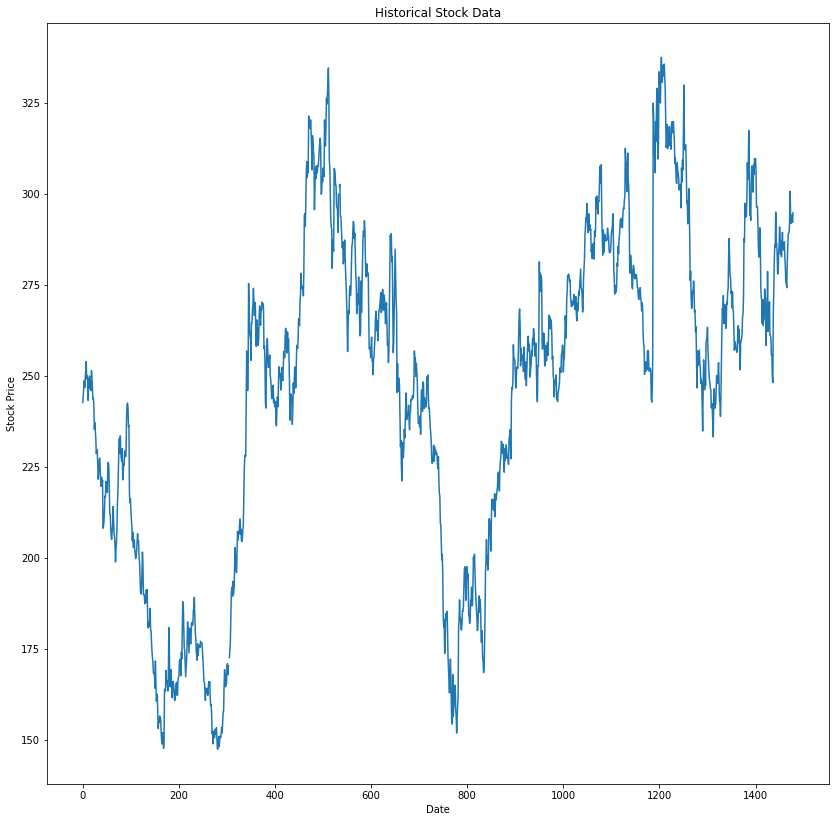

In [107]:
#Visualising the above dataset
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [108]:
#Dropping of unneccessary columns in dataframe
stk_data['Date'] = stk_data.index
stk_data=stk_data.drop(['Adj Close','Volume'],axis=1)

#Determining the number of NAN values in dataframe
stk_data.isnull().sum()

Date     0
Open     2
High     2
Low      2
Close    2
dtype: int64

In [109]:
#Replacing the nan values with mean of their respective column
item_list=['Open','High','Low','Close']
for item in item_list:
  stk_data[item]=stk_data[item].fillna(stk_data[item].mean())

stk_data.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [110]:
#Preprocessing of data for LSTM model
train_set=stk_data.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(train_set)
X_train=[]
y_train=[]
for i in range(60,1478):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [111]:
#Defining the LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [112]:
#Training the LSTM model for the given dataset
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=20,batch_size=24)

Epoch 1/20
60/60 [==============================] - 5s 86ms/step - loss: 0.0320
Epoch 2/20
60/60 [==============================] - 5s 91ms/step - loss: 0.0098
Epoch 3/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0086
Epoch 4/20
60/60 [==============================] - 5s 91ms/step - loss: 0.0087
Epoch 5/20
60/60 [==============================] - 5s 91ms/step - loss: 0.0069
Epoch 6/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0076
Epoch 7/20
60/60 [==============================] - 5s 91ms/step - loss: 0.0066
Epoch 8/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0061
Epoch 9/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0061
Epoch 10/20
60/60 [==============================] - 6s 93ms/step - loss: 0.0057
Epoch 11/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0055
Epoch 12/20
60/60 [==============================] - 6s 92ms/step - loss: 0.0057
Epoch 13/20
60/60 [==================

In [113]:
#Importing data for testing purpose
testdataframe=pd.read_csv('/content/Testdata_SBI.csv')
testdataframe['Date'] = testdataframe.index

#Dropping unnecesaary column from dataframe
testdataframe=testdataframe.drop(['Adj Close','Volume'],axis=1)

#Determining nan values in testdataframe
testdataframe.isnull().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [114]:
#Replacing the nan values with mean of their respective columns
item_list=['Open','High','Low','Close']
for item in item_list:
  testdataframe[item]=testdataframe[item].fillna(testdataframe[item].mean())

testdataframe.isnull().sum()


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [115]:
#Determining X_test and y_test using testdataframe
real_stock_price = testdataframe.iloc[:, 1:2].values[:175]
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [116]:
#Predicting the stock prices using the above trained model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [117]:
#Determining metrics for the given model

#Mean Squared Error for given LSTM model
mse=mean_squared_error(real_stock_price,predicted_stock_price)
print("Mean Squared Error for given LSTM model:",mse)

#Mean Absolute Error for given LSTM model
mae=mean_absolute_error(real_stock_price,predicted_stock_price)
print("Mean Absolute Error for given LSTM model:",mae)

#R-squared Error for given LSTM model
r2=r2_score(real_stock_price,predicted_stock_price)
print("R-Squared Error for given LSTM model:",r2)

#Root Mean Squared Error for given LSTM model
rmse=mse**0.5
print("Root Mean Squared Error for given LSTM model:",rmse)


Mean Squared Error for given LSTM model: 113.943355922489
Mean Absolute Error for given LSTM model: 8.263102854140625
R-Squared Error for given LSTM model: 0.8758910977345263
Root Mean Squared Error for given LSTM model: 10.674425320479271


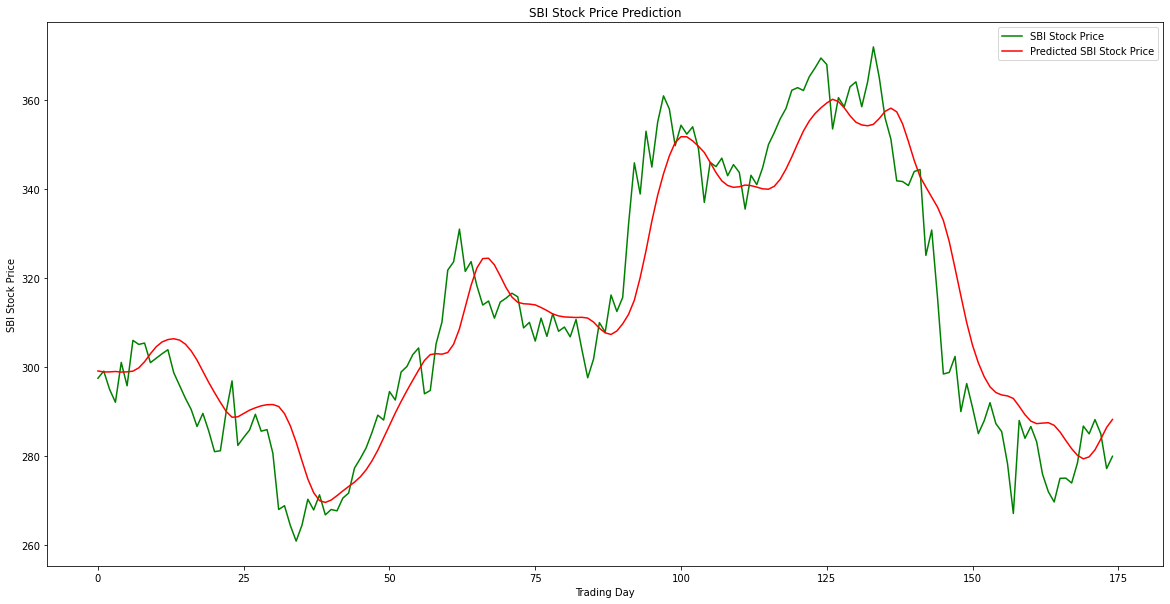

In [118]:
#Plotting of Real stock price along with predicted stock price
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()